# Wand Binds to ImageMagick

[Wand](https://docs.wand-py.org/) is a `ctypes`-based [📖 [docs](https://docs.python.org/3/library/ctypes.html#module-ctypes)] simple [ImageMagick](http://www.imagemagick.org/) binding for Python.

## Cropping an Image

We are going to crop an image we will generate, following these steps:

1. generate a transparent image
2. draw on the image
3. draw a cropping rectangle
4. crop the image

### Generate a Transparent Image

In accord with [the documentation](https://docs.wand-py.org/en/0.6.3/guide/read.html#open-an-empty-image):

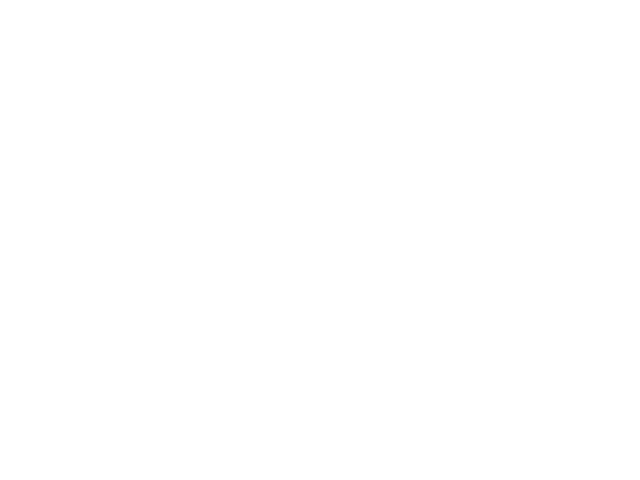

In [1]:
import IPython
from wand.image import Image

size = (640, 480)
output_filename = f'wand_01_transparent_{size[0]}x{size[-1]}.png'

with Image(width=size[0], height=size[-1]) as img:
    img.save(filename=output_filename)

IPython.display.Image(filename=output_filename) # transparency will display as white 😐

### Draw on a Transparent Image

[The documentation](https://docs.wand-py.org/en/0.6.3/guide/draw.html) shows us the nested `with`-`as` blocks making a the pattern for drawing on an image:

```python
from wand.drawing import Drawing
from wand.image import Image

with Drawing() as draw:
    # does something with ``draw`` object,
    # and then...
    with Image(filename='wandtests/assets/beach.jpg') as image:
        draw(image)
```

However, the preference here is not draw on the original image written above. We are going to `.clone()` [📖 [docs](https://docs.wand-py.org/en/0.6.3/guide/read.html#clone-an-image)] the image, making a new copy:

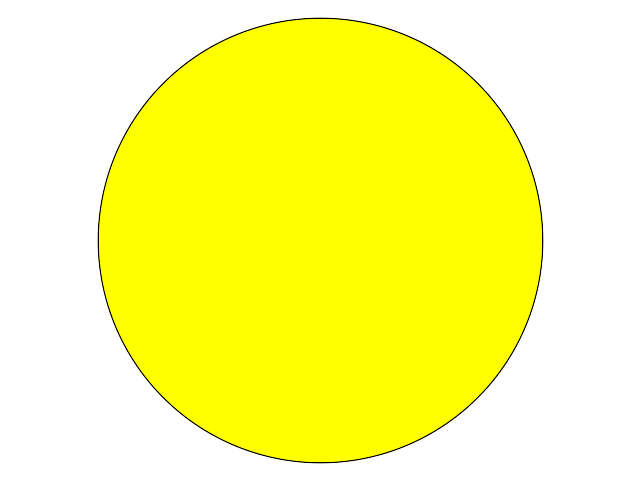

In [2]:
from wand.drawing import Drawing
from wand.color import Color

output_filename = f'wand_01_drawing_{size[0]}x{size[-1]}.png'
x, y = 320, 240

with Drawing() as draw:
    draw.fill_color = Color('yellow')
    draw.stroke_color = Color('black')
    draw.stroke_width = 1
    draw.circle((x, y), # Center point
                (128, 128)) # Perimeter point

    with Image(filename='./wand_01_transparent_640x480.png') as original:
        with original.clone() as clone:
            draw(clone)
            clone.save(filename=output_filename)

IPython.display.Image(filename=output_filename)

### Draw a Cropping Rectangle

Now let us target a cropping area by drawing it out first. Let’s target a 50x50 square at the top, left:

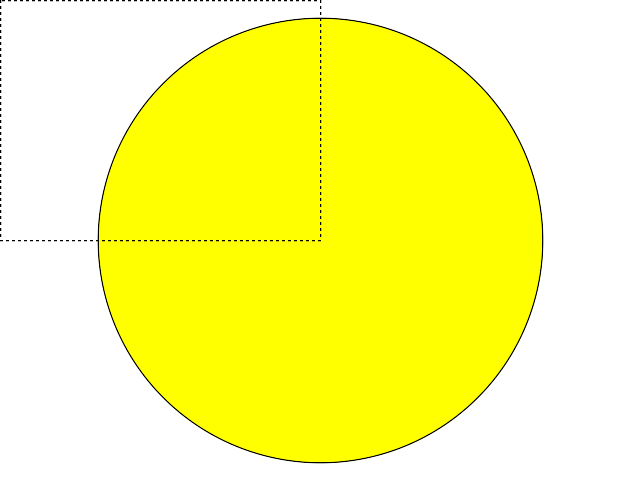

In [3]:
output_filename = f'wand_01_crop_target_{size[0]}x{size[-1]}.png'

with Drawing() as draw:
    draw.fill_color = Color('transparent')
    draw.stroke_color = Color('black')
    draw.stroke_dash_array = [2,4]
    draw.stroke_width = 1
    draw.rectangle(
        left=0,
        top=0,
        right=x,
        bottom=y)

    with Image(filename='./wand_01_drawing_640x480.png') as original:
        with original.clone() as clone:
            draw(clone)
            clone.save(filename=output_filename)

IPython.display.Image(filename=output_filename)

The documentation for `stroke_dash_array` provided by Wand is not explaining `stroke_dash_array` as of this writing. The underlying ImageMagick documentation is also doing [very little](https://www.imagemagick.org/Usage/draw/#stroke).

### Cropping an Image

[📖 [docs](https://docs.wand-py.org/en/0.6.3/guide/resizecrop.html#crop-images)]

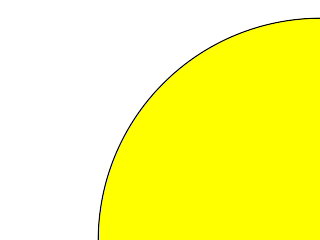

In [4]:
output_filename = f'wand_01_cropped.png'

with Image(filename='./wand_01_drawing_640x480.png') as original:
    with original.clone() as clone:
        clone.crop(
            left=0,
            top=0,
            right=x,
            bottom=y)
        clone.save(filename=output_filename)

IPython.display.Image(filename=output_filename)